# Objective:
### To perform EDA on Haberman's Cancer survival dataset
[Haberman's Survival Dataset](https://archive.ics.uci.edu/ml/datasets/Haberman's+Survival) contains cases from a study conducted on the survival of patients who had undergone surgery for breast cancer between 1958 and 1970 at the University of Chicago's Billings Hospital. My aim in this study is to conduct some exploratory data analysis (EDA) to find out if there are any patterns in this data and to handle any missing values (if present).

**SUMMARY:**
   * [What is the dataset?](#data)
   
   * [Missing values and datatypes](#firststep)
   
   * [Histogram](#hist)

   * [Barplot](#barplot)
   
   * [Pairplot](#pairplot)
   
   * [Distplot](#distplot)
   
   * [PDF & CDF](#pdfandcdf)
   
   * [Boxplot & Violinplot](#boxviolin)
   
   * [Swarmplot](#swarm)
   
   * [Jointplot(kde)](#joint)
   
   * [Conclusion](#conclude)

<a id='data'> </a>
**Introduction to the dataset** 

It is important to understand what the features in our data mean. If we don't know what they are, it would be difficult to make sense of our observations. I did a simple Google search to find out more about this particular dataset. Following is the meaning of each attribute(in order column 1 to 4).

1. Age of patient at time of operation (numerical) 
2. Patient's year of operation (year - 1900, numerical) 
3. Number of positive axillary nodes detected (numerical) 
4. Survival status (class attribute) 
    - 1 = the patient survived 5 years or longer 
    - 2 = the patient died within 5 year

Let's import the libraries we need.

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import numpy as np

Load the data in a dataframe.

In [130]:
# reading the csv file stored under ./
# specifying header = None, otherwise, the first row will be interpreted as column names.

df = pd.read_csv('./haberman.csv', header = None)
df.head()

,0,1,2,3
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


The dataframe is loaded, but it's important to give meaningful names to columns, so that we can make sense of the features during EDA.

In [131]:
columns = ['age', 'operation_year', 'axillary_nodes','survival_status']
df.columns = columns
df.head()

,age,operation_year,axillary_nodes,survival_status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


<a id='firststep'></a>
**Any missing Values?**

The above dataframe looks better. Now let's take a glace at our data. Specifically, we'll try to check:
    - Are there any missing values in the dataset?
    - What are the datatypes of the features?

In [132]:
print('-'*67)
print("df.info()")
print('-'*67)
print(df.info(), end='\n------------------------------------------------------------------\n')
print("df.describe()")
print('-'*67)
print(df.describe())
print('-'*67)
print(df['survival_status'].value_counts())

-------------------------------------------------------------------
df.info()
-------------------------------------------------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
age                306 non-null int64
operation_year     306 non-null int64
axillary_nodes     306 non-null int64
survival_status    306 non-null int64
dtypes: int64(4)
memory usage: 9.6 KB
None
------------------------------------------------------------------
df.describe()
-------------------------------------------------------------------
              age  operation_year  axillary_nodes  survival_status
count  306.000000      306.000000      306.000000       306.000000
mean    52.457516       62.852941        4.026144         1.264706
std     10.803452        3.249405        7.189654         0.441899
min     30.000000       58.000000        0.000000         1.000000
25%     44.000000       60.000000        0.000000         1.000000
50% 

Looking at the stats printed above, we notice:
    - There are no missing values in any of the features (columns).
    - The datatype of all values is int64, which makes sense considering we have integer data
    - The mean, standard deviation, 25th, 50th, and 75th percentile of the data, as well as the minimum and maximum
    - The dataset contains 225 people with survived status=1 and 81 people with survived status=2. The two classes are not balanced.

<a id='hist' > </a>

**Histogram**
      
Now, we'll begin visualizing our dataset. We'll plot figures for the 3 independent variables i.e. Age, Axillary nodes, and Operation year. Survival Status is either 1 or 2. Looking at the histograms below, we observe that:
    - Most people in the study belonged to the age group 35-65
    - 1958 had the most number of operations. After that they are roughly uniformly distributed
    - Majority of the people had axillary nodes < 10. The max value of 52 we saw in the above result is an outlier

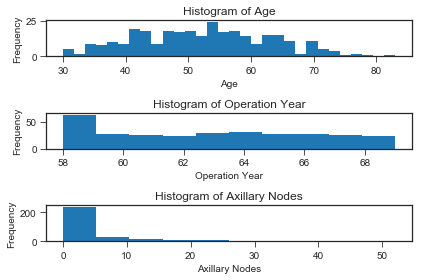

In [133]:
sbn.set_style('ticks')

# Figure 1
plt.figure(1)

# Creating a subplot with 3 rows and 1 column and activate subplot 1
plt.subplot(3,1,1)
df['age'].plot(kind='hist', bins = 30)
plt.xlabel('Age')
plt.title('Histogram of Age')

# Activate subplot no. 2  
plt.subplot(3,1,2)
df['operation_year'].plot(kind='hist', bins = 10)
plt.xlabel('Operation Year')
plt.title('Histogram of Operation Year')

# Activate subplot 3
plt.subplot(3,1,3)
df['axillary_nodes'].plot(kind='hist', bins = 10)
plt.xlabel('Axillary Nodes')
plt.title('Histogram of Axillary Nodes')

plt.tight_layout()

<a id='barplot'></a>
**Barplot**

Our main feature of interest here is survival status(the dependent variable). We'd like to know if there's any pattern between it and the other three features. So, let's see how these are distributed.

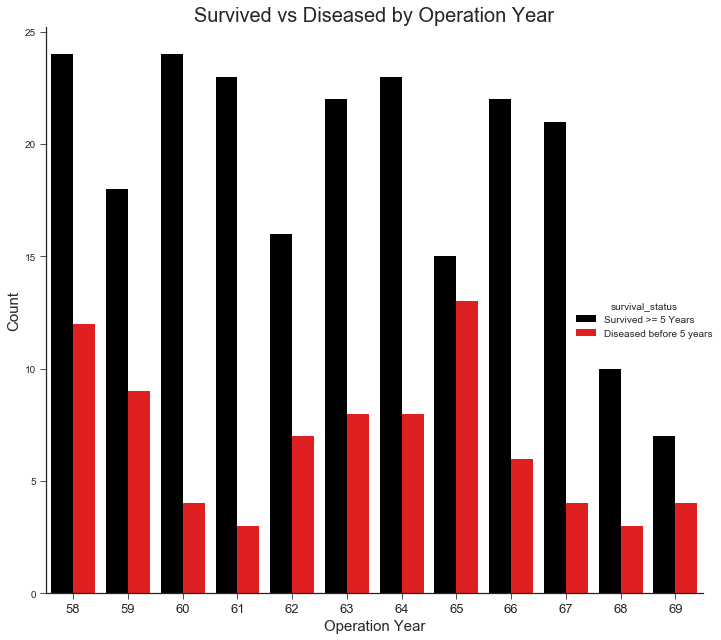

In [136]:
# dodge = True will avoid overlapping bars
g = sbn.factorplot(data=df, x='operation_year',kind='count', hue='survival_status',size=9, \
                   palette = {1:'k', 2: 'r'}, dodge=True, legend_out=True)
g.set_xticklabels(rotation=0)

new_labels = ['Survived >= 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xticks(fontsize=13)
plt.xlabel('Operation Year', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Survived vs Diseased by Operation Year', fontsize=20)
plt.tight_layout()

The above plot tells us that number of people who survived >= 5 years was always more than number of people who diseased under 5 years after the operation.

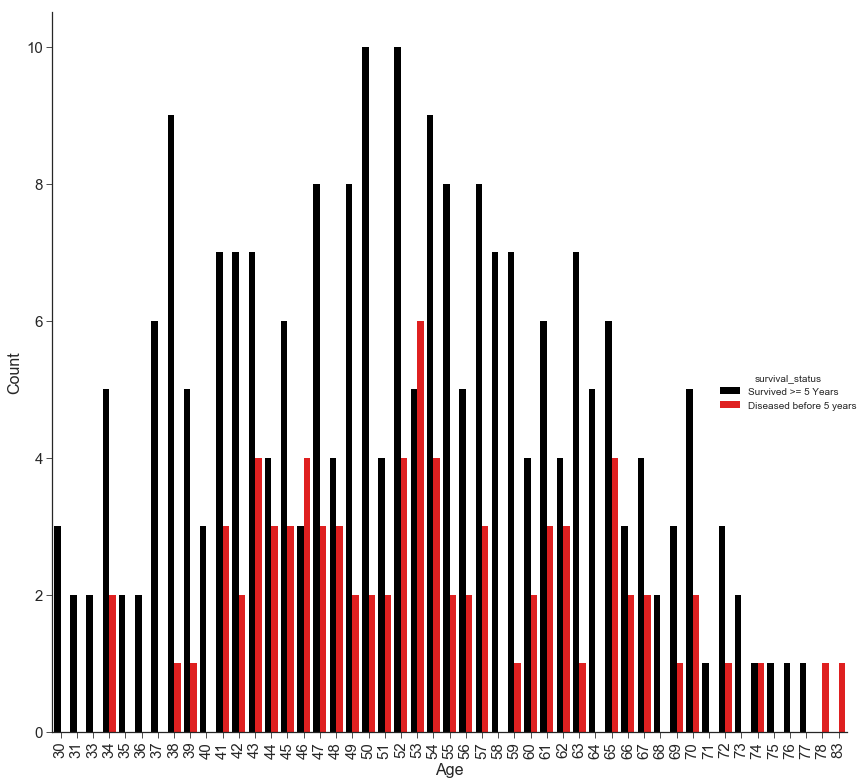

In [139]:
g = sbn.factorplot(data=df, x='age',kind='count', hue='survival_status',size=11, palette = {1:'k', 2: 'r'}, dodge=True)
g.set_xticklabels(rotation=90)
new_labels = ['Survived >= 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

plt.xlabel('Age', fontsize=16)
plt.xticks(fontsize=15)
plt.ylabel('Count', fontsize=16)
plt.yticks(fontsize=15)
plt.tight_layout()

In the above plot, we can see that most people under 40 who had the operation, survived. Which follows logically. If the cancer is discovered and treated early, chances of survival should also increase.

Similarly, following is the bar plot of number of people survived against the number of axillary nodes. People who had none had a high chance of survival.

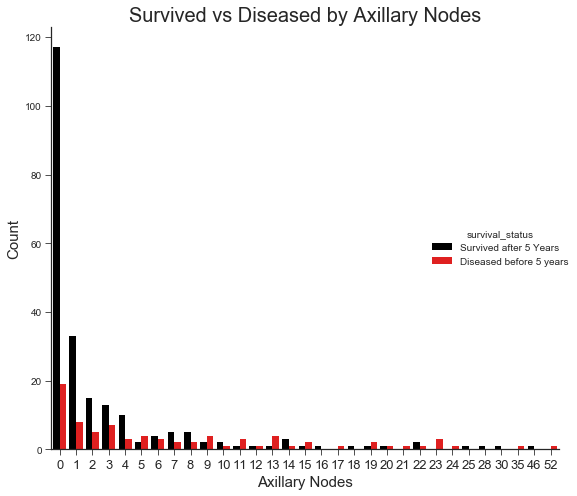

In [140]:
g = sbn.factorplot(data=df, x='axillary_nodes',kind='count', hue='survival_status',size=7, \
                   palette = {1:'k', 2: 'r'}, dodge=True)
g.set_xticklabels(rotation=0)
plt.xticks(fontsize=13)
new_labels = ['Survived after 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)
plt.xlabel('Axillary Nodes', fontsize=15)
plt.ylabel('Count', fontsize=15)
plt.title('Survived vs Diseased by Axillary Nodes', fontsize=20)
plt.tight_layout()

<a id='pairplot' > </a>
**Pairplot**

Pairplot helps us with bivariate analysis. Can we observe any patterns among the pair of variables below?

Unfortunately, it isn't as informative as we would like. Still, it gives us some information such as:
    - People with 0 axillary nodes had a high chance of surviving beyond 5 years.
    - Number of people who survived after being operated was more than the number people who diseased.
    
These are not new observations. We saw them in the earlier bar plots. But it's good to sanity check.

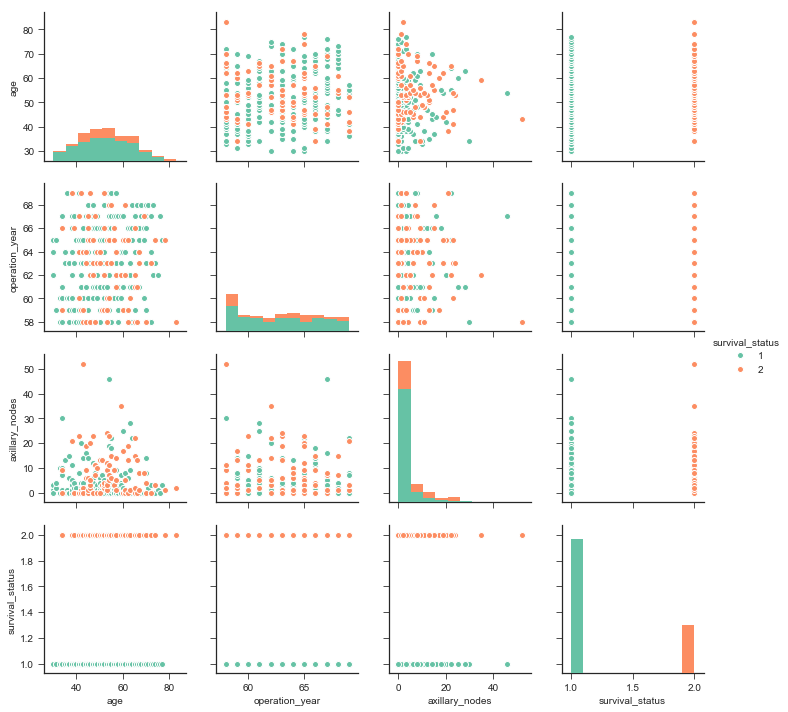

In [141]:
g=sbn.pairplot(data=df, hue = 'survival_status', kind = 'scatter',  palette=sbn.color_palette('Set2'), size = 2.5)

<a id='distplot'> </a>
**Distribution Plot**

Let's do some distribution plots.

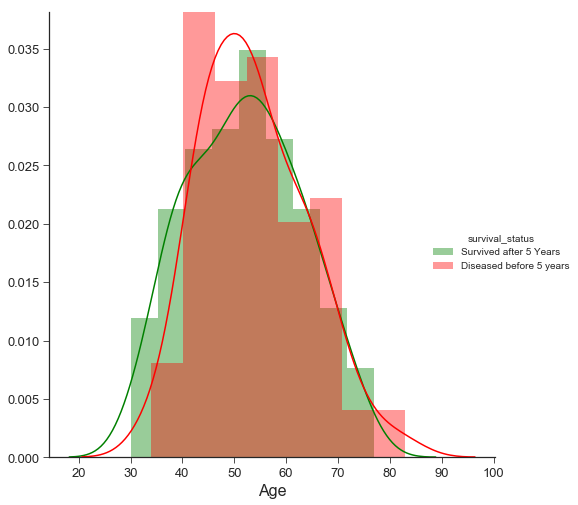

In [142]:
g=sbn.FacetGrid(data=df, hue='survival_status', size = 7, palette={1:'g', 2:'r'}) \
    .map(sbn.distplot, 'age').add_legend()
g.set_xlabels('Age', fontsize=16)
g.set_xticklabels(fontsize=13)
g.set_yticklabels(fontsize=13)
    
new_labels = ['Survived after 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

The two distributions overlap quite a lot. Age is clearly not a distinguishing attribute to predict survival chances. While operating Cancer early certainly helps, we cannot say with certainty that a person will survive beyond 5 years, *once age crosses 35*. What about Operation Year?

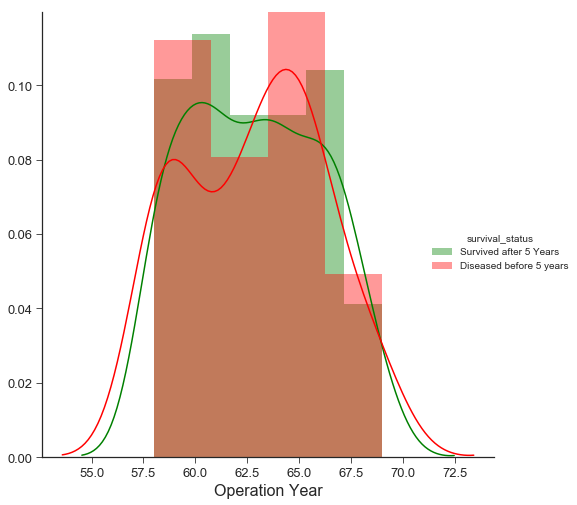

In [143]:
g=sbn.FacetGrid(data=df, hue='survival_status', size = 7, palette = {1:'g', 2:'r'}) \
    .map(sbn.distplot, 'operation_year').add_legend()
g.set_xlabels('Operation Year', fontsize=16)
g.set_xticklabels(fontsize=13)
g.set_yticklabels(fontsize=13)

new_labels = ['Survived after 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

The two distributions almost completely overlap. The year in which the operation happened cannot determine whether a person will survive beyond 5 years. This is only logical and consistent with our expectation. What about number of Axillary nodes?

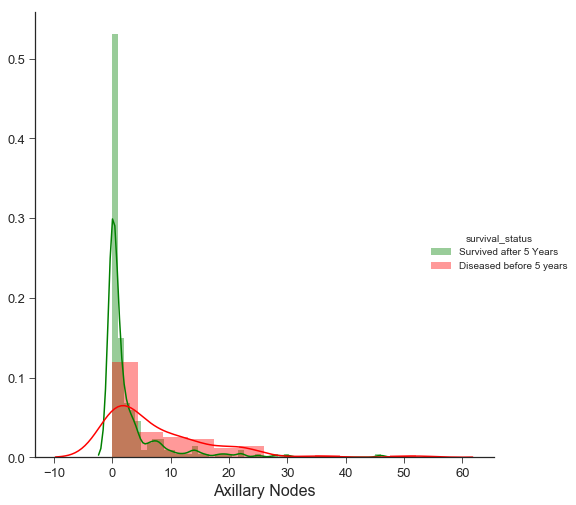

In [144]:
g=sbn.FacetGrid(data=df, hue='survival_status', size = 7, palette={1:'g', 2:'r'}) \
    .map(sbn.distplot, 'axillary_nodes').add_legend()

g.set_xlabels('Axillary Nodes', fontsize=16)
g.set_xticklabels(fontsize=13)
g.set_yticklabels(fontsize=13)
new_labels = ['Survived after 5 Years', 'Diseased before 5 years']
for t, l in zip(g._legend.texts, new_labels): t.set_text(l)

The above plot is another sanity check. As expected, people with 0 axillary nodes have a high chance of survival.

<a id = 'pdfandcdf' > </a>
**PDF and CDF**

Now, let's calculate PDF and CDF of our numerical features.

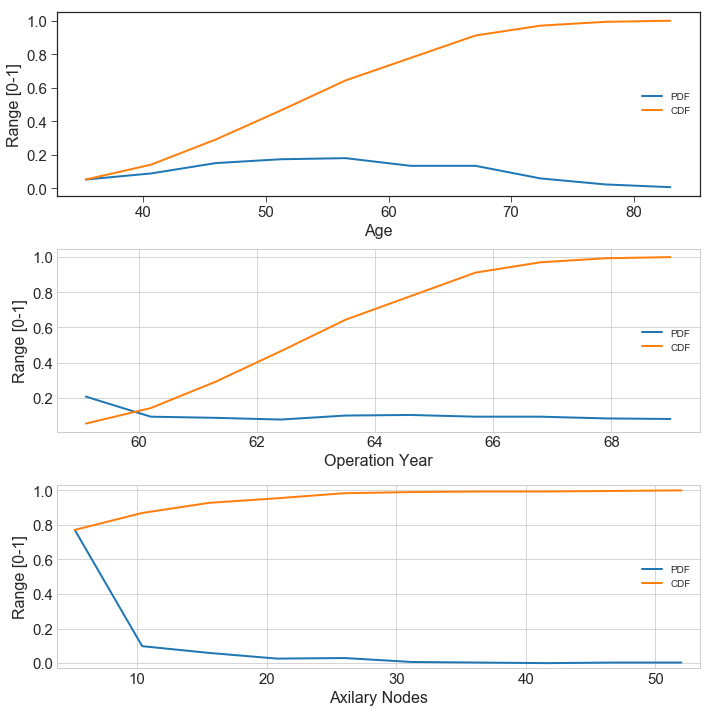

In [145]:
plt.figure(2, figsize=(10,10))
plt.subplot(3,1,1)
sbn.set_style('whitegrid')
counts, bin_edges = np.histogram(df['age'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf  = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF',linestyle='-', linewidth=2)
plt.plot(bin_edges[1:], cdf, label='CDF', linewidth=2)
plt.legend(loc=5)
plt.xlabel('Age', fontsize=16)
plt.ylabel('Range [0-1]', fontsize = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.subplot(3,1,2)
counts, bin_edges = np.histogram(df['operation_year'], bins=10,density = True)
pdf = counts/(sum(counts))


plt.plot(bin_edges[1:], pdf, label='PDF',linestyle='-', linewidth=2)
plt.plot(bin_edges[1:], cdf, label='CDF', linewidth=2)
plt.legend(loc=5)
plt.xlabel('Operation Year', fontsize=16)
plt.ylabel('Range [0-1]', fontsize = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)


plt.subplot(3,1,3)
counts, bin_edges = np.histogram(df['axillary_nodes'], bins=10,density = True)
pdf = counts/(sum(counts))
cdf  = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf, label='PDF',linestyle='-', linewidth=2)
plt.plot(bin_edges[1:], cdf, label='CDF', linewidth=2)
plt.legend(loc=5)
plt.xlabel('Axilary Nodes', fontsize=16)
plt.ylabel('Range [0-1]', fontsize = 16)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)

plt.margins(0.03)
plt.tight_layout()


- From the CDF, we can see that 90th percentile for age is around 70 years.
- 80th percentile of #Axillary nodes is < 5

<a id='boxviolin' > </a>
**Boxplot and Violinplot**

Let's plot box and violin plots in a grid of size 3x2

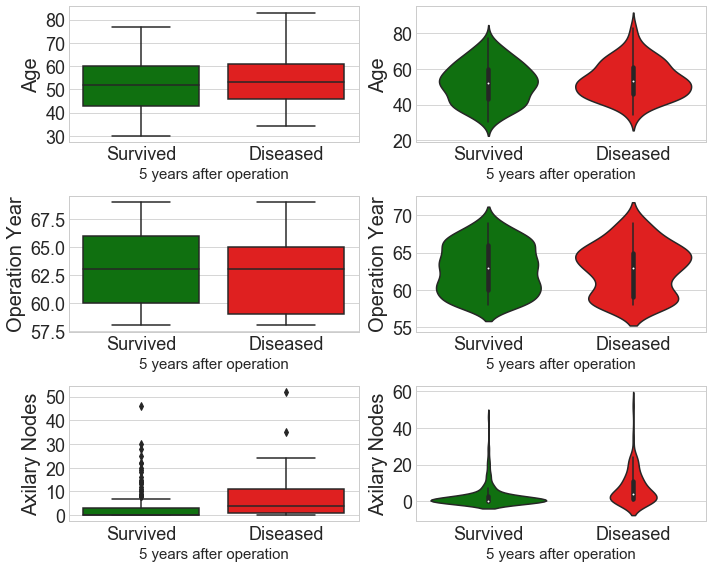

In [146]:
plt.figure(3, figsize=(10,8))
plt.subplot(3,2,1)

sbn.boxplot(data=df, y='age', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Age', fontsize=20)

plt.subplot(3,2,2)
sbn.violinplot(data=df, y='age', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Age', fontsize=20)

plt.subplot(3,2,3)

sbn.boxplot(data=df, y='operation_year', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Operation Year', fontsize=20)

plt.subplot(3,2,4)
sbn.violinplot(data=df, y='operation_year', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Operation Year', fontsize=20)

plt.subplot(3,2,5)

sbn.boxplot(data=df, y='axillary_nodes', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Axilary Nodes', fontsize=20)

plt.subplot(3,2,6)
sbn.violinplot(data=df, y='axillary_nodes', x = 'survival_status', palette={1:'g', 2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Axilary Nodes', fontsize=20)

plt.tight_layout()


The 75th percentile of axillary nodes of people who survived was less than the median(50th percentile) number of axilary nodes detected in people who didn't survive beyond 5 years. Thus, higher the number of nodes detected, lesser the chances of survival.

Apart from these, we can't draw any distinguishing conclusion.

<a id = 'swarm' > </a>
**Swarmplot**

Swarmplots are basically violin plots with each data point plotted distinctly.

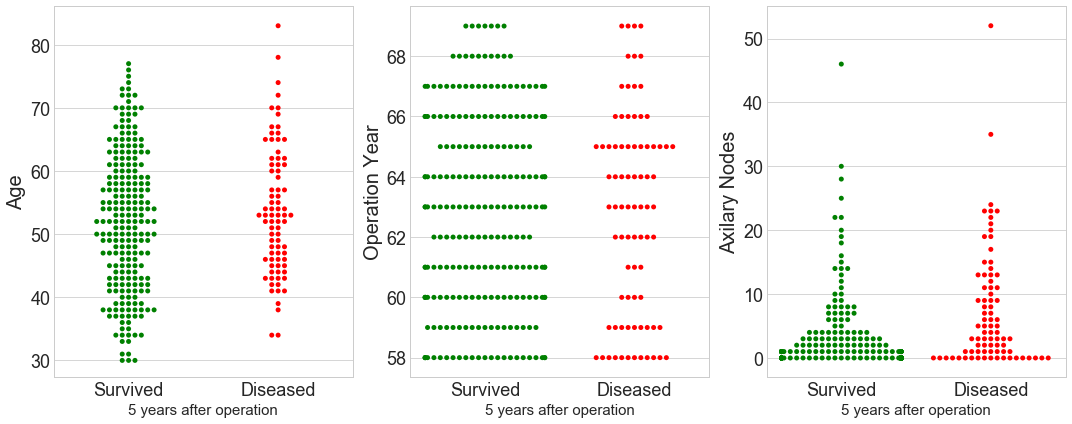

In [147]:
plt.figure(figsize=(15,6))
plt.subplot(1,3,1)
sbn.swarmplot(data=df, x='survival_status', y='age', dodge=True, palette={1:'g',2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Age', fontsize=20)

plt.subplot(1,3,2)
sbn.swarmplot(data=df, x='survival_status', y='operation_year', dodge=True, palette={1:'g',2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Operation Year', fontsize=20)

plt.subplot(1,3,3)
sbn.swarmplot(data=df, x='survival_status', y = 'axillary_nodes', dodge=True, palette={1:'g',2:'r'})
plt.xticks([0,1], ('Survived', 'Diseased'), rotation = 0, fontsize = 18)
plt.yticks(fontsize=18)
plt.xlabel('5 years after operation', fontsize=15)
plt.ylabel('Axilary Nodes', fontsize=20)

plt.tight_layout()

<a id='joint'> </a>

**Jointplot**

These can also be interpreted as contour plots. The darker areas are highly populated while the lighter ones are thinly populated. They also display an important variable called Pearson's r coefficient. The value of 1 corresponds to perfect positive corelation, while -1 corresponds to perfect negative corelation. And 0 means no corelation. As you can observe below:
    - Operation Year shows very small -ve corelation. It's very near to being neutral (0), hence not worth considering.
    - Age shows a slight positive corelation with survival. i.e. as age increases, value of the variable survival status increases (1->2), which means greater the age, lower the chances of survival.
    - Axillary nodes show better positive corelation of 0.29. As the number of nodes increase, value of variable survival status increases (1->2) i.e. survived to diseased. This tallies with our observations so far.

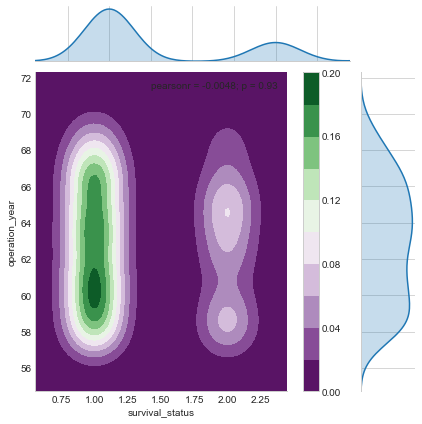

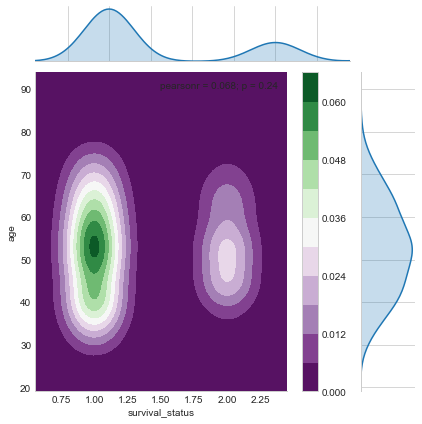

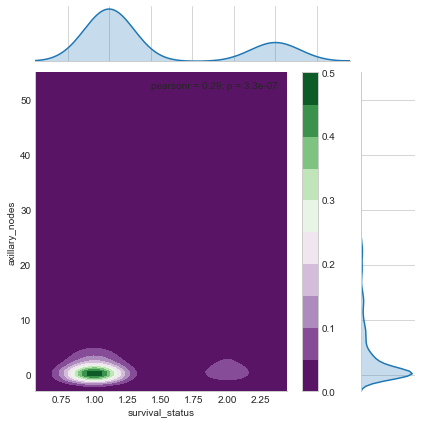

In [148]:
sbn.jointplot(data=df, y='operation_year', x='survival_status', kind='kde', cbar=True, legend = True, cmap='PRGn',shade=True)

sbn.jointplot(data=df, y='age', x='survival_status', kind='kde', cbar=True, cmap ='PRGn', shade=True)

sbn.jointplot(data=df, y='axillary_nodes', x='survival_status', kind='kde', cmap='PRGn', cbar=True, shade=True)

<a = id='conclude' > </a>
## Conclusion

We can draw the following conclusions from this EDA:
    - #People who survived for more than 5 years were greater than those who diseased under 5 years of being operated.
    - Number of people operated were highest in 1958 (in this dataset), after that they were roughly uniformly distrubuted
    - Most people had positive axillary nodes < 10. Those who had 0 nodes had a high chance of surviving more than 5 years
    - People under 40 who were operated had a high chance of survival compared to older people
    - There is no relation between Year of Operation and chances of survival. Hence, we may igonre this variable if we build a prediction model for this dataset.

                                                                                                            Tanmay K